In [1]:
from src.solution import MultiODPath, MultiODSolution
from src.problem import MultiODProblem
from src.operators import *
from src.utils import display_result

p = MultiODProblem(num_O=8, num_taxi=1, seed=1)
paths = [[0, 1, 9, 8, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]
paths1 = [[0, 1, 8, 9, 16, 5, 17, 2, 4, 3, 7, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths2 = [[0, 1, 9, 8, 16, 5, 17, 3, 2, 7, 4, 12, 6, 14, 13, 11, 10, 15, 0]]  # sub-optimal
paths3 = [[i for i in range(18)] + [0]]
s = MultiODSolution(paths3, p)

In [2]:
path = s.paths[0]

In [3]:
path 

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0])

In [57]:
o1 = TwoOptOperator()
o2 = ExchangeOperator()
o3 = InsertOperator()
o4 = OForwardOperator(length=2)
o5 = DBackwardOperator(length=2)
o6 = ODPairsExchangeOperator()
o7 = RandomODPairsExchangeOperator(change_percentage=0.1)
o8 = RandomOForwardOperator(change_percentage=0.1)
o9 = RandomDBackwardOperator(change_percentage=0.1)
o10 = OForwardOperator(length=3)

In [76]:
path.block_dict

{0: SliceableDeque([Node(node_id=8, OD_type=0, seq_id=2, block_id=0, in_block_seq_id=0, block_OD=0),
                 Node(node_id=9, OD_type=0, seq_id=3, block_id=0, in_block_seq_id=1, block_OD=0),
                 Node(node_id=3, OD_type=0, seq_id=4, block_id=0, in_block_seq_id=2, block_OD=0),
                 Node(node_id=7, OD_type=0, seq_id=5, block_id=0, in_block_seq_id=3, block_OD=0)]),
 3: SliceableDeque([Node(node_id=4, OD_type=0, seq_id=7, block_id=3, in_block_seq_id=0, block_OD=0),
                 Node(node_id=2, OD_type=0, seq_id=8, block_id=3, in_block_seq_id=1, block_OD=0),
                 Node(node_id=5, OD_type=0, seq_id=9, block_id=3, in_block_seq_id=2, block_OD=0)]),
 6: SliceableDeque([Node(node_id=15, OD_type=1, seq_id=6, block_id=6, in_block_seq_id=0, block_OD=1)]),
 9: SliceableDeque([Node(node_id=14, OD_type=1, seq_id=12, block_id=9, in_block_seq_id=0, block_OD=1),
                 Node(node_id=16, OD_type=1, seq_id=13, block_id=9, in_block_seq_id=1, block_OD=1

In [85]:
# randomly exchange OD pairs given certain percentage
improved_path, min_delta, label = o2(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))
# fig = display_result(p, s)

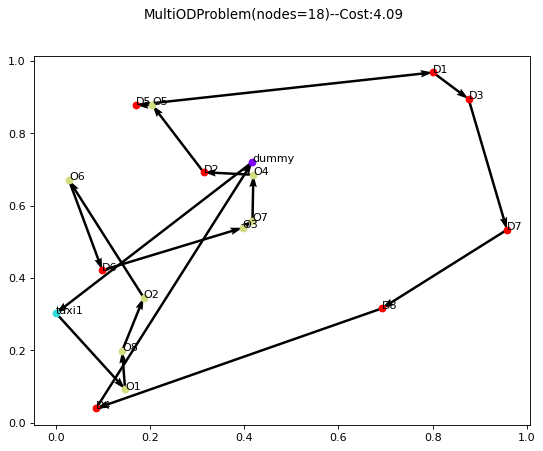

In [86]:
fig = display_result(p, s)

In [8]:
# improved_path, min_delta, label = o1(s, 4)
improved_path, min_delta, label = o5(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

MultiODPath([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 10, 11, 12, 16, 17, 0])
True
6.605271324672758


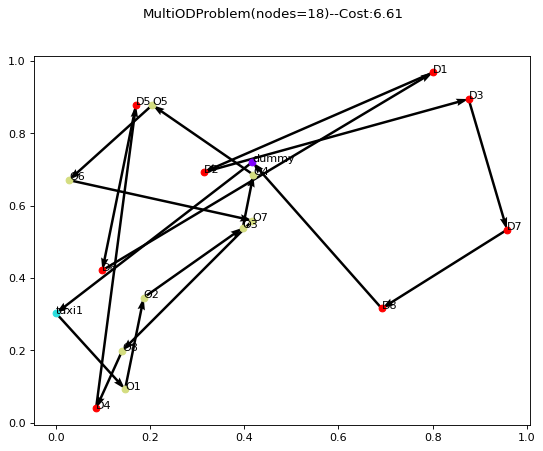

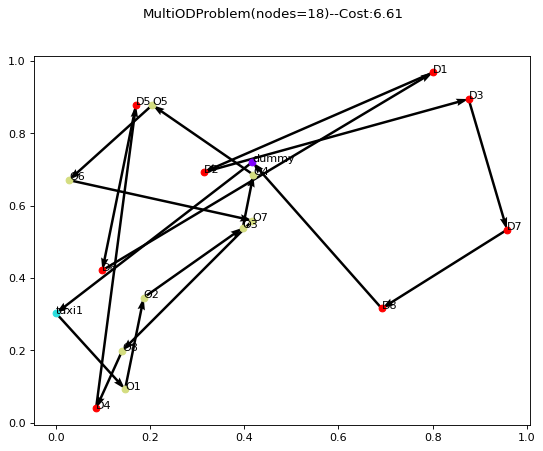

In [9]:
display_result(p, s)

In [10]:
# L2I operators, state

In [11]:
# operators:
# in-block optimization: 2-opt
# O up, D down
# O down, D up 

In [12]:
# OD pairs exchange
improved_path, min_delta, label = o6(s)
if improved_path is not None:
    print(improved_path)
    print(p.is_feasible(s))
    print(p.calc_cost(s))

MultiODPath([0, 1, 3, 2, 4, 5, 6, 7, 8, 9, 13, 14, 15, 11, 10, 12, 16, 17, 0])
True
5.7293509499648785


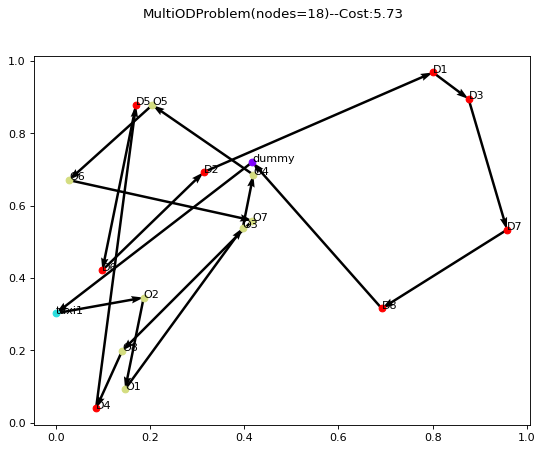

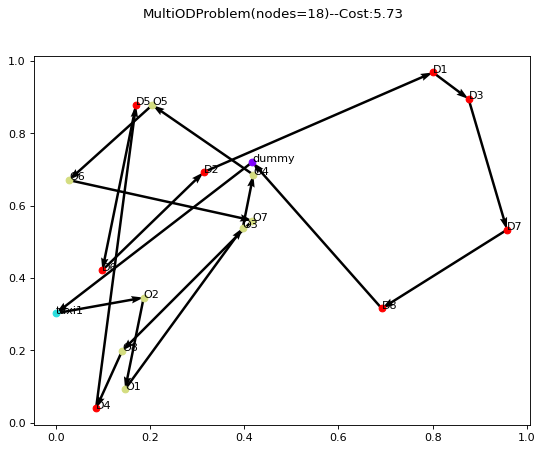

In [13]:
display_result(p, s)